<a href="https://colab.research.google.com/github/olgavel1998/Study1/blob/main/R_S_School_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - Data quality assessment

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

sns.set_style('darkgrid')

In [3]:
data = pd.read_csv("forest.csv", index_col="Id")
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


- Context

__Problem__: predict the forest cover type (the predominant kind of tree cover) from cartographic variables. 

__Dataset__: train.csv from https://www.kaggle.com/competitions/forest-cover-type-prediction

The dataset provides following information:
<p> 1) Elevation - Elevation in meters
<p> 2) Aspect - Aspect in degrees azimuth
<p> 3) Slope - Slope in degrees
<p> 4) Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
<p> 5) Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
<p> 6) Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
<p> 7) Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
<p> 8) Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
<p> 9) Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
<p> 10) Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
<p> 11) Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
<p> 12) Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
<p> 13) Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation, target variable

__The wilderness areas are__:
<p> 1 - Rawah Wilderness Area
<p>  2 - Neota Wilderness Area
<p>  3 - Comanche Peak Wilderness Area
<p>  4 - Cache la Poudre Wilderness Area

__The soil types are__:
<p> 1. Cathedral family - Rock outcrop complex, extremely stony.
<p> 2. Vanet - Ratake families complex, very stony.
<p> 3. Haploborolis - Rock outcrop complex, rubbly.
<p> 4. Ratake family - Rock outcrop complex, rubbly.
<p> 5. Vanet family - Rock outcrop complex complex, rubbly.
<p> 6. Vanet - Wetmore families - Rock outcrop complex, stony.
<p> 7. Gothic family.
<p> 8. Supervisor - Limber families complex.
<p> 9. Troutville family, very stony.
<p> 10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
<p> 11. Bullwark - Catamount families - Rock land complex, rubbly.
<p> 12. Legault family - Rock land complex, stony.
<p> 13. Catamount family - Rock land - Bullwark family complex, rubbly.
<p> 14. Pachic Argiborolis - Aquolis complex.
<p> 15. unspecified in the USFS Soil and ELU Survey.
<p> 16. Cryaquolis - Cryoborolis complex.
<p> 17. Gateview family - Cryaquolis complex.
<p> 18. Rogert family, very stony.
<p> 19. Typic Cryaquolis - Borohemists complex.
<p> 20. Typic Cryaquepts - Typic Cryaquolls complex.
<p> 21. Typic Cryaquolls - Leighcan family, till substratum complex.
<p> 22. Leighcan family, till substratum, extremely bouldery.
<p> 23. Leighcan family, till substratum - Typic Cryaquolls complex.
<p> 24. Leighcan family, extremely stony.
<p> 25. Leighcan family, warm, extremely stony.
<p> 26. Granile - Catamount families complex, very stony.
<p> 27. Leighcan family, warm - Rock outcrop complex, extremely stony.
<p> 28. Leighcan family - Rock outcrop complex, extremely stony.
<p> 29. Como - Legault families complex, extremely stony.
<p> 30. Como family - Rock land - Legault family complex, extremely stony.
<p> 31. Leighcan - Catamount families complex, extremely stony.
<p> 32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
<p> 33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
<p> 34. Cryorthents - Rock land complex, extremely stony.
<p> 35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
<p> 36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
<p> 37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
<p> 38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
<p> 39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
<p> 40. Moran family - Cryorthents - Rock land complex, extremely stony.

In [4]:
data.shape

(15120, 55)

**Number of observations**: 15120    
**Number of variables**: 55 (out of which one (**Cover_Type**) is target variable)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [6]:
print(f'Missing cells: {data.isna().sum().sum()}')
print(f'Missing cells(%): {round((data.isna().sum().sum() / (data.shape[0] * data.shape[1])) * 100, 2)}%')

Missing cells: 0
Missing cells(%): 0.0%


In [ ]:
data.duplicated().sum()

0

In [7]:
num_cols = data.columns[:10].tolist()
print(f'Number of numeric variables: {len(num_cols)}')
print(num_cols)

Number of numeric variables: 10
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


- Let's apply reverse-one-hot-encoding to **Wilderness_Area** and **Soil_Type**:

In [8]:
data["Wilderness_Area"] = data.loc[:, 'Wilderness_Area1':'Wilderness_Area4'].idxmax(axis=1)
data["Soil_Type"] = data.loc[:, 'Soil_Type1':'Soil_Type40'].idxmax(axis=1)
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area,Soil_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,5,Wilderness_Area1,Soil_Type29
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,5,Wilderness_Area1,Soil_Type29
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,2,Wilderness_Area1,Soil_Type12
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,2,Wilderness_Area1,Soil_Type30
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,5,Wilderness_Area1,Soil_Type29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15116,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,3,Wilderness_Area3,Soil_Type4
15117,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,3,Wilderness_Area3,Soil_Type4
15118,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,3,Wilderness_Area3,Soil_Type4


In [9]:
cat_cols = data.columns[-3:].tolist()
print(f'Number of categorical variables: {len(cat_cols)}')
print(cat_cols)

Number of categorical variables: 3
['Cover_Type', 'Wilderness_Area', 'Soil_Type']


- Numeric variabeles

In [10]:
data[num_cols].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


In [11]:
 for col in num_cols:
        print(col)
        print(f'Distinct: {len(data[col].value_counts())}')
        print(f'Distinct(%): {round((len(data[col].value_counts()) / data.shape[0]) * 100, 2)}%')
        print(f'Minimum: {data[col].min()}')
        print(f'Maximum: {data[col].max()}')
        print(f'Mean: {round(data[col].mean())}')
        print(f'Median: {round(data[col].median())}')
        IQR = data[col].describe()['75%'] - data[col].describe()['25%']
        print(f'Interquartile range: {IQR}\n')

Elevation
Distinct: 1665
Distinct(%): 11.01%
Minimum: 1863
Maximum: 3849
Mean: 2749
Median: 2752
Interquartile range: 728.0

Aspect
Distinct: 361
Distinct(%): 2.39%
Minimum: 0
Maximum: 360
Mean: 157
Median: 126
Interquartile range: 196.0

Slope
Distinct: 52
Distinct(%): 0.34%
Minimum: 0
Maximum: 52
Mean: 17
Median: 15
Interquartile range: 12.0

Horizontal_Distance_To_Hydrology
Distinct: 400
Distinct(%): 2.65%
Minimum: 0
Maximum: 1343
Mean: 227
Median: 180
Interquartile range: 263.0

Vertical_Distance_To_Hydrology
Distinct: 423
Distinct(%): 2.8%
Minimum: -146
Maximum: 554
Mean: 51
Median: 32
Interquartile range: 74.0

Horizontal_Distance_To_Roadways
Distinct: 3250
Distinct(%): 21.49%
Minimum: 0
Maximum: 6890
Mean: 1714
Median: 1316
Interquartile range: 1506.0

Hillshade_9am
Distinct: 176
Distinct(%): 1.16%
Minimum: 0
Maximum: 254
Mean: 213
Median: 220
Interquartile range: 39.0

Hillshade_Noon
Distinct: 141
Distinct(%): 0.93%
Minimum: 99
Maximum: 254
Mean: 219
Median: 223
Interquartile r

- Mean and median values for **Horizontal_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Points** significantly differ from max values. Probably there are a lot of outliers.  

In [12]:
### Categorical/Binary variables

In [13]:
data[cat_cols].astype('object').describe()

,Cover_Type,Wilderness_Area,Soil_Type
count,15120,15120,15120
unique,7,4,38
top,5,Wilderness_Area3,Soil_Type10
freq,2160,6349,2142


In [14]:
for col in cat_cols:
    print(col)
    display(pd.DataFrame({
    'count': data[col].value_counts(),
    'frequency(%)': (data[col].value_counts() / data.shape[0]) * 100
    }))

Cover_Type


,count,frequency(%)
5,2160,14.285714
2,2160,14.285714
1,2160,14.285714
7,2160,14.285714
3,2160,14.285714
6,2160,14.285714
4,2160,14.285714


Wilderness_Area


,count,frequency(%)
Wilderness_Area3,6349,41.990741
Wilderness_Area4,4675,30.919312
Wilderness_Area1,3597,23.789683
Wilderness_Area2,499,3.300265


Soil_Type


,count,frequency(%)
Soil_Type10,2142,14.166667
Soil_Type29,1291,8.538360
Soil_Type3,962,6.362434
Soil_Type4,843,5.575397
Soil_Type23,757,5.006614
Soil_Type38,728,4.814815
Soil_Type30,725,4.794974
Soil_Type32,690,4.563492
Soil_Type39,657,4.345238
Soil_Type6,650,4.298942


# Visualization

- Numerical variables

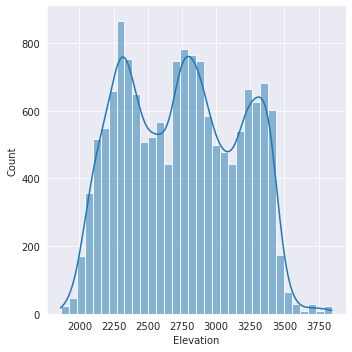

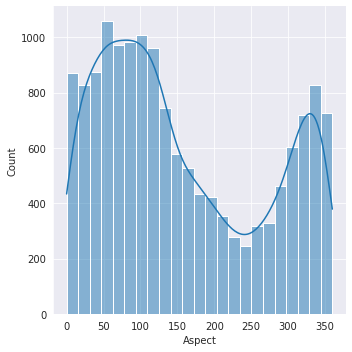

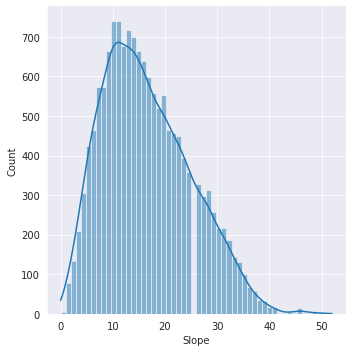

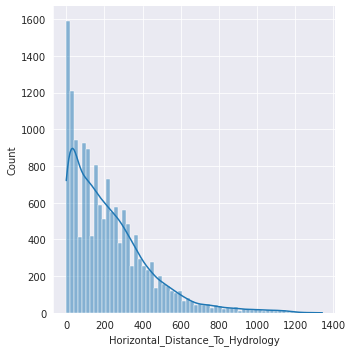

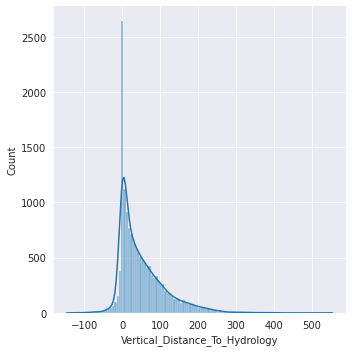

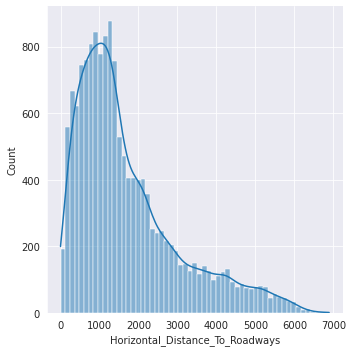

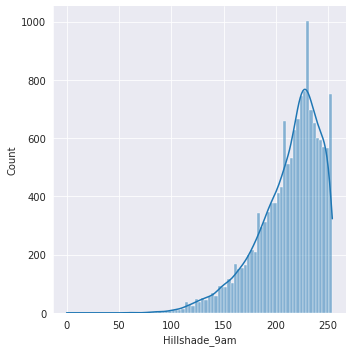

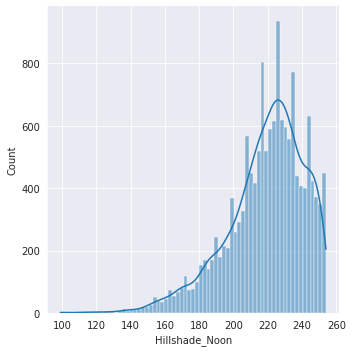

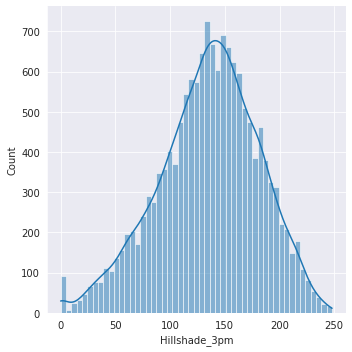

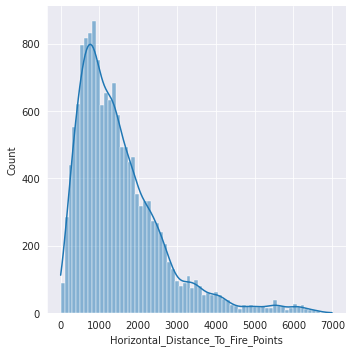

In [15]:
for i, col in enumerate(num_cols):
    sns.displot(data=data, x=col, kde=True)

 **Slope**, **Horizontal_Distance_To_Hydrology**, **Vertical_Distance_To_Hydrology**, **Horizontal_Distance_To_Roadways**, **Horizontal_Distance_To_Fire_Points** are skewed right.  
**Hilshade_9am**, **Hillshade_Noon** are skewed left.

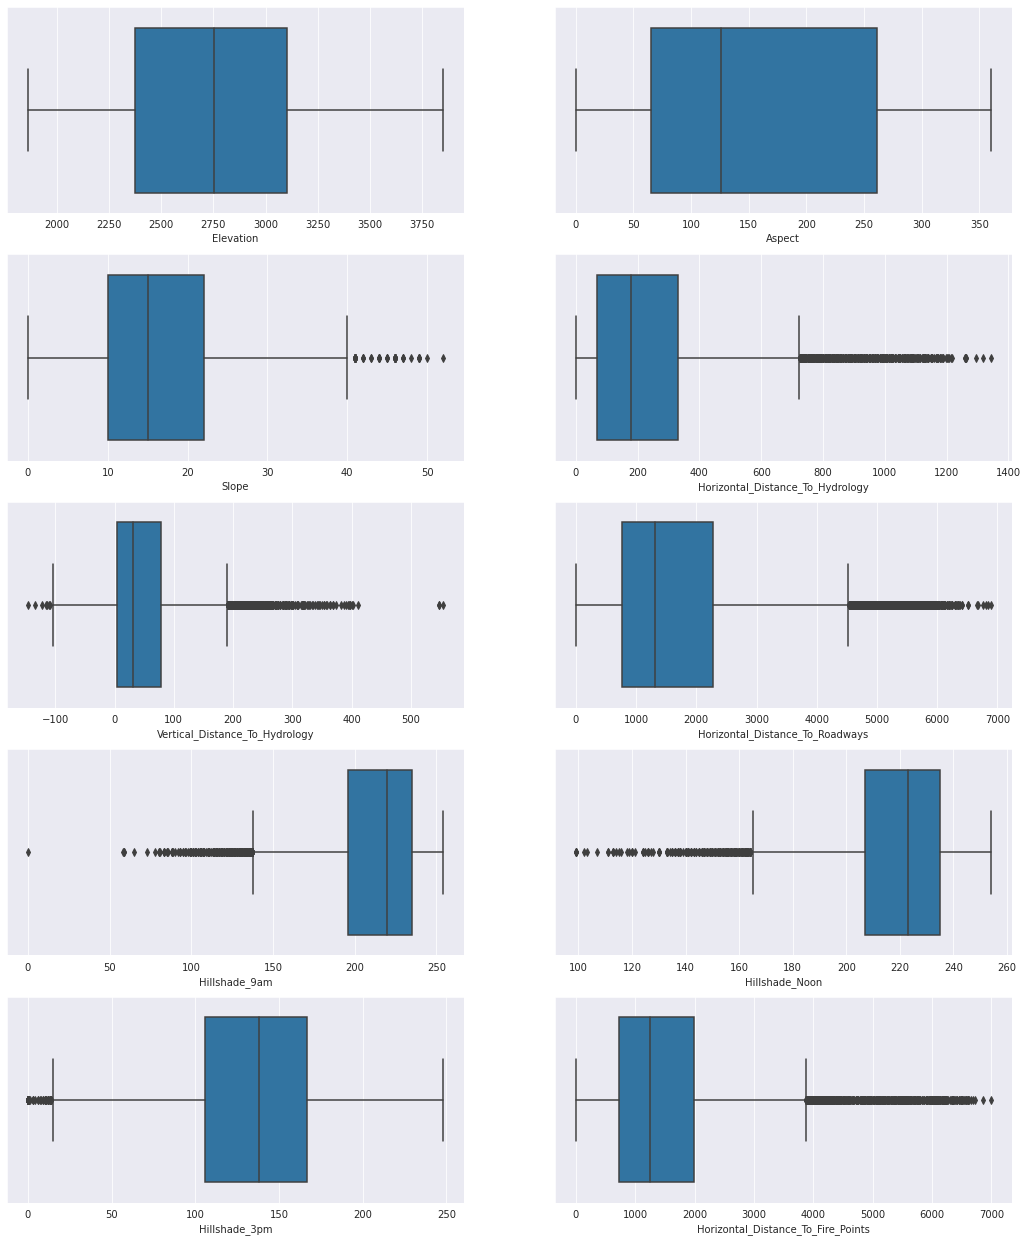

In [16]:
fig, axes = plt.subplots(5, 2, figsize=(18,22))
for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=data, ax=axes[int(i / 2), i % 2])

In [ ]:
import seaborn as sns
sns.__version__

'0.11.2'

- Categorical variables

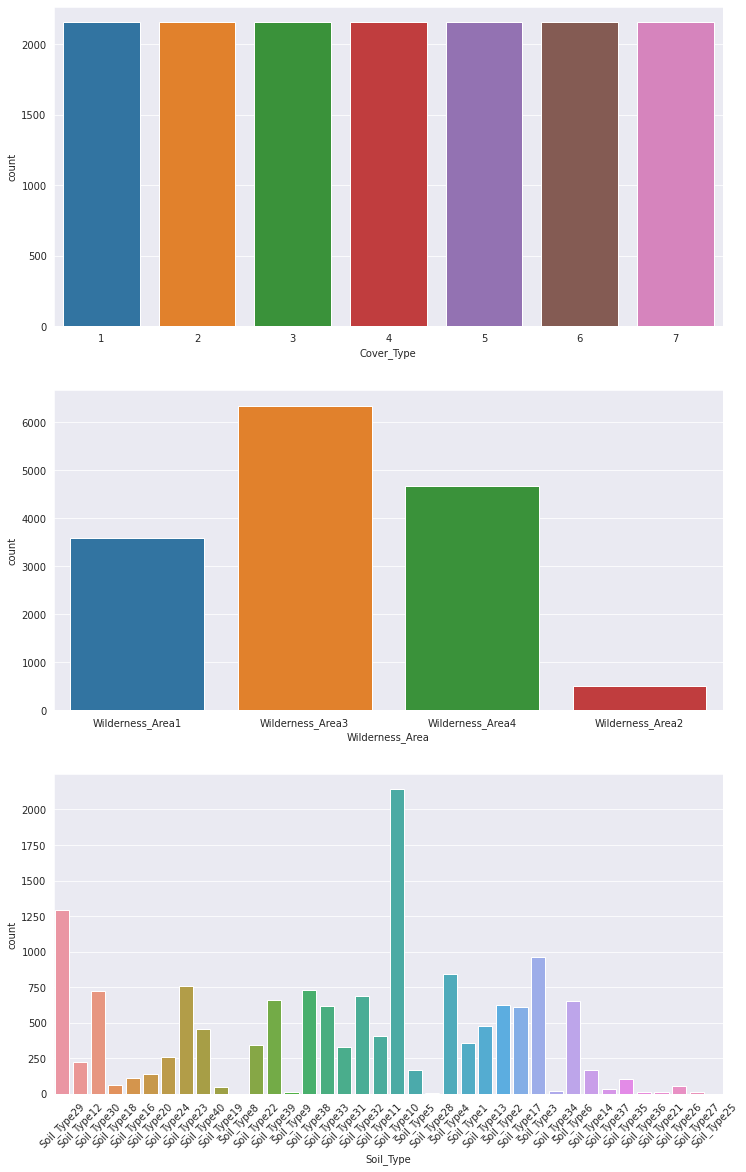

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(12,20))
for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=col, ax=axes[i])
    plt.xticks(rotation=45)

We can reduce number of __Soil_Type categories__ grouping some of them by frequency or description.

- 2.1 Continuous x Categorical

Exploring the relationship between each variable and the target

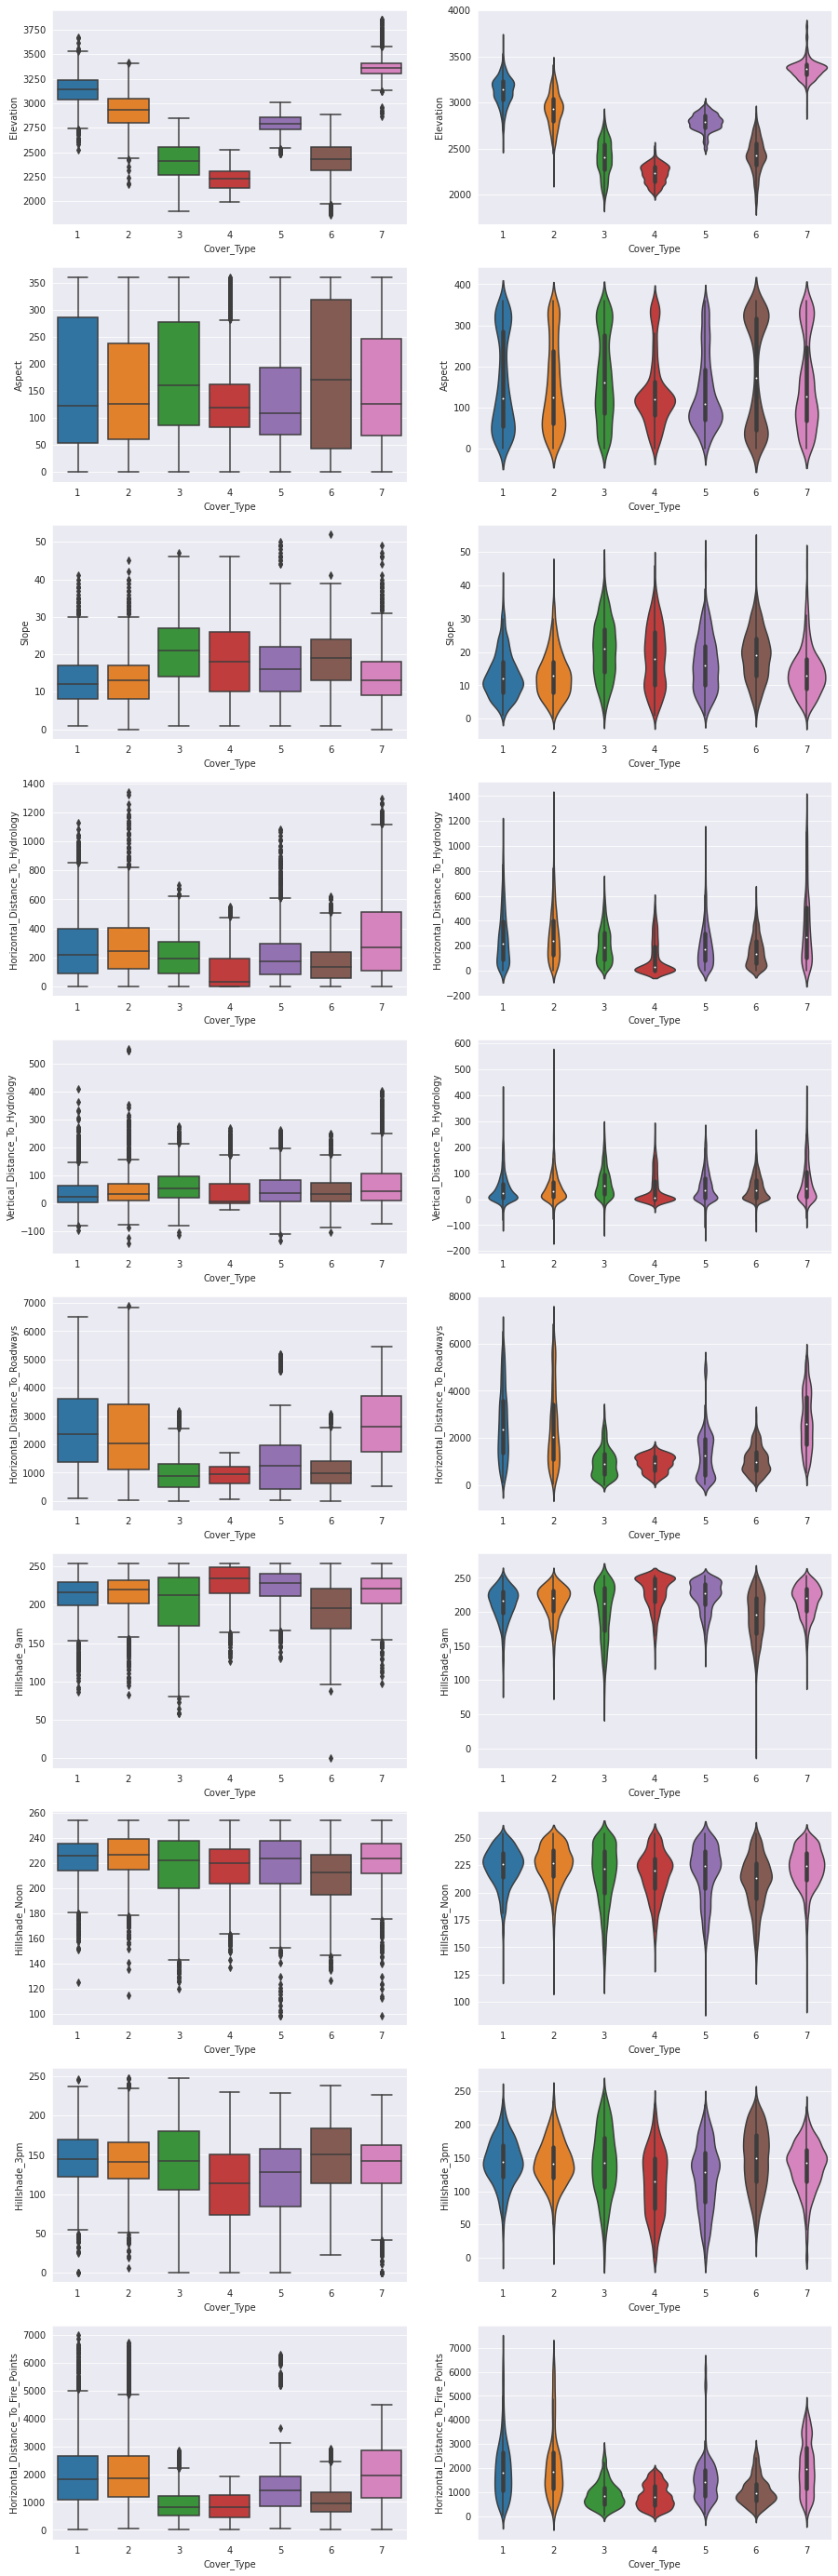

In [18]:
fig, axes = plt.subplots(10, 2, figsize=(15, 50))
for i, col in enumerate(num_cols):
    sns.boxplot(data=data, x="Cover_Type", y=col, ax=axes[i, 0])
    sns.violinplot(data=data, x="Cover_Type", y=col, ax=axes[i, 1])

__Elevation__ looks like a good predictor of cover type.

- 2.2 Categorical x Categorical

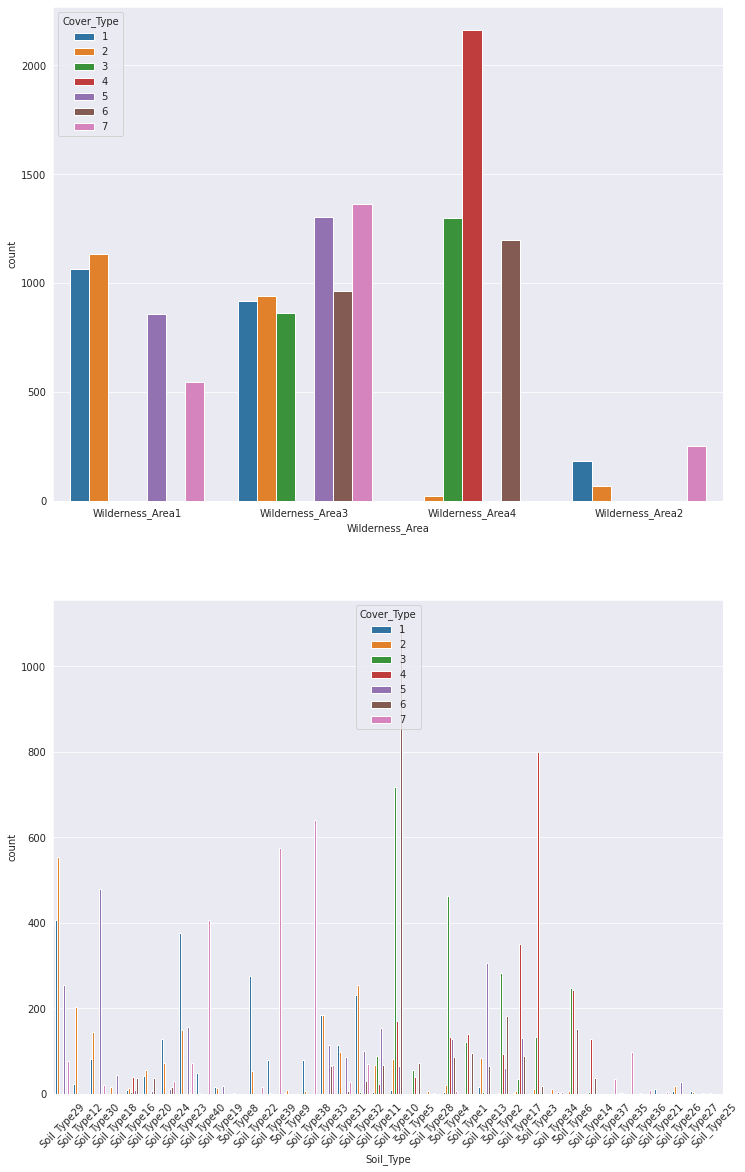

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(12,20))
for i, col in enumerate(["Wilderness_Area", "Soil_Type"]):
    sns.countplot(data=data, x=col, hue="Cover_Type", ax=axes[i])
    plt.xticks(rotation=45)

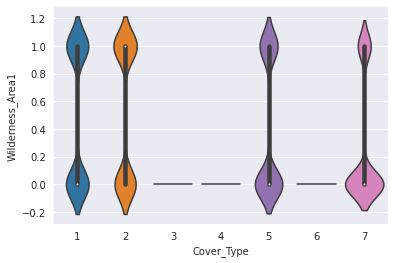

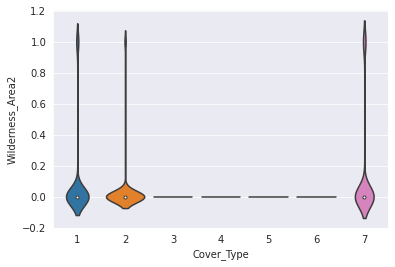

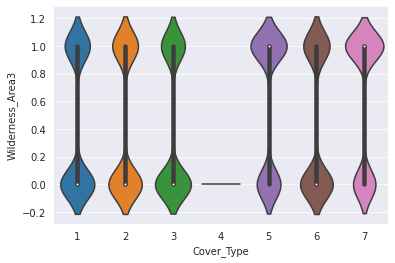

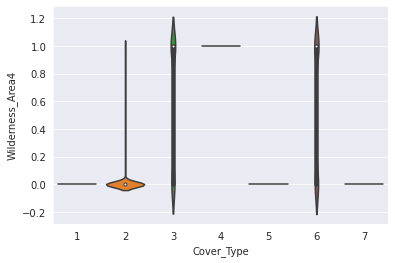

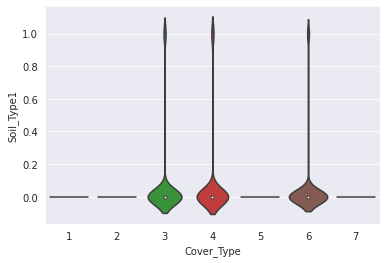

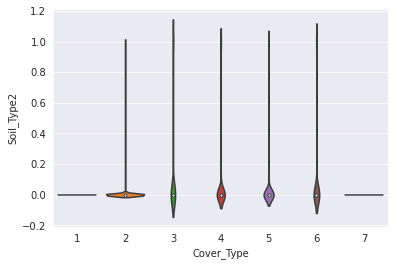

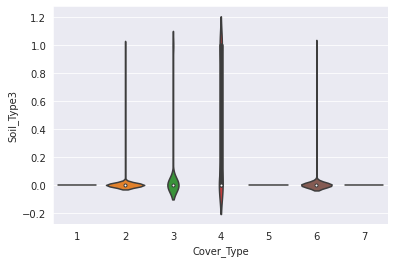

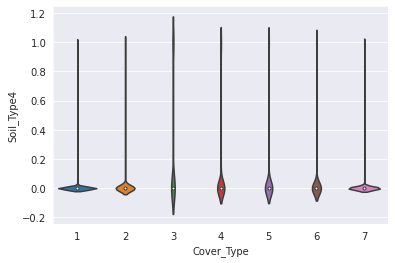

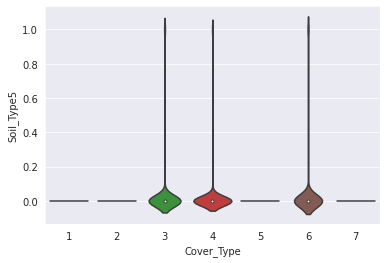

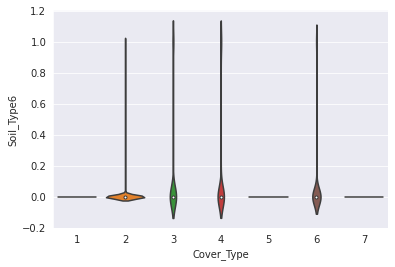

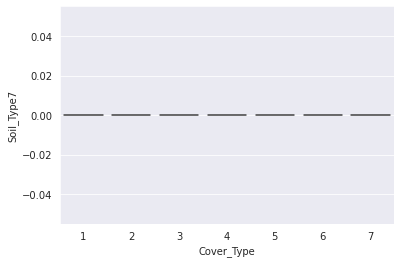

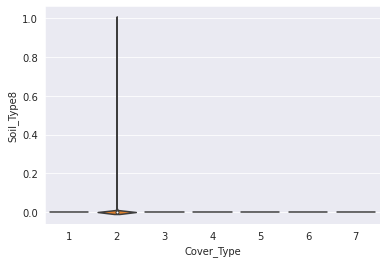

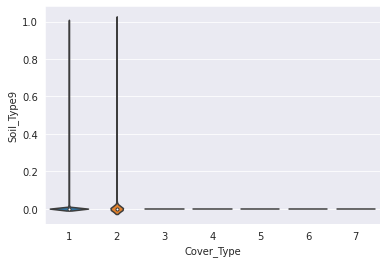

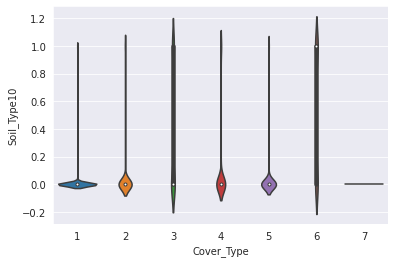

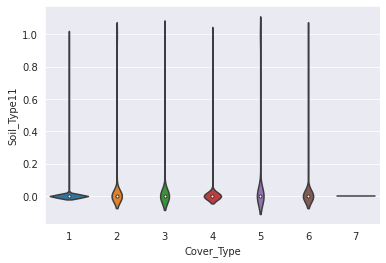

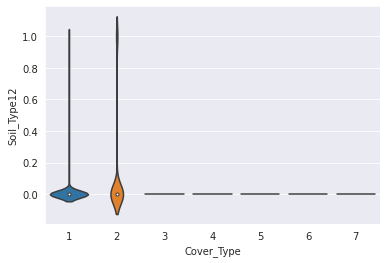

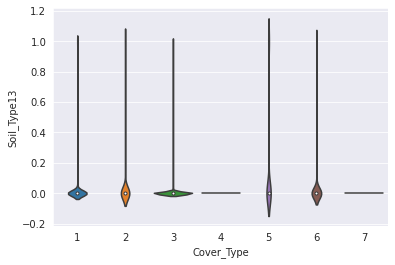

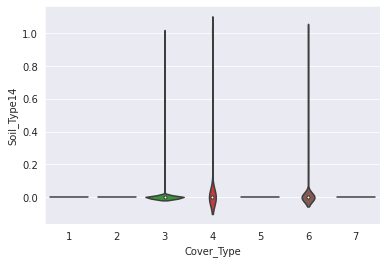

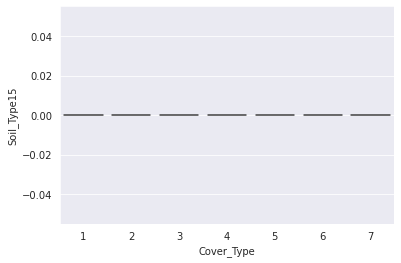

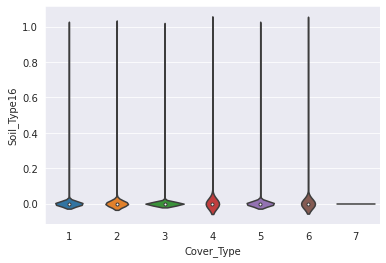

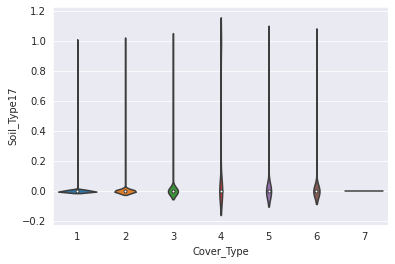

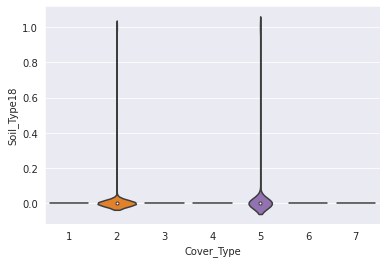

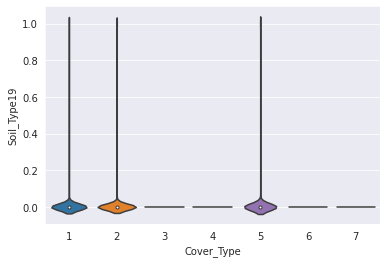

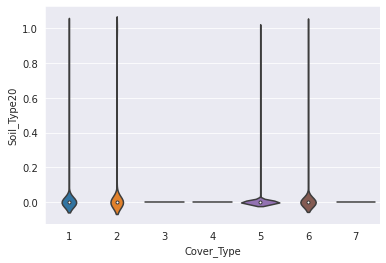

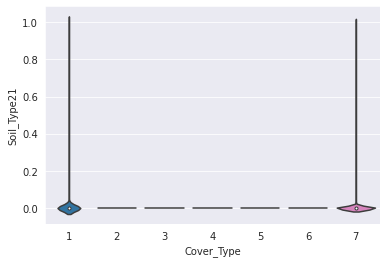

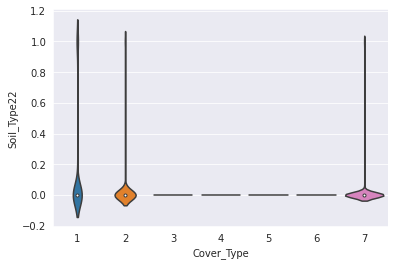

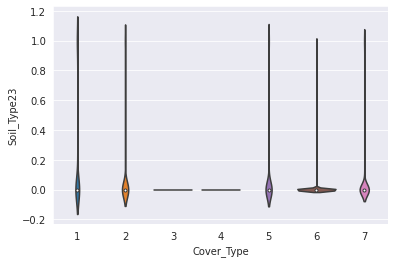

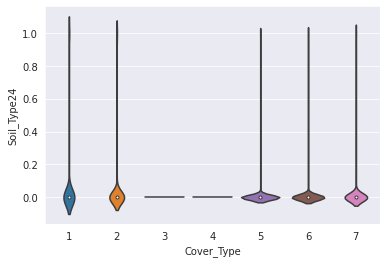

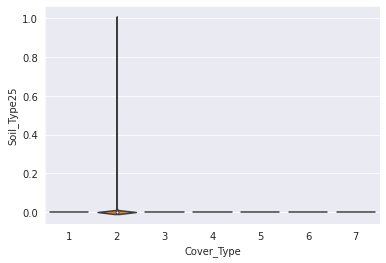

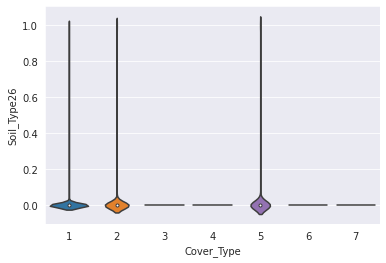

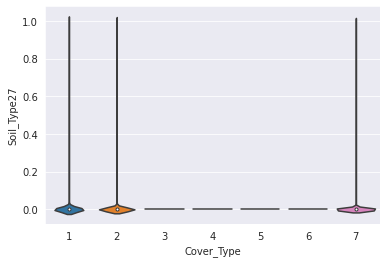

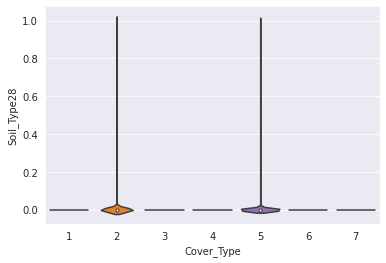

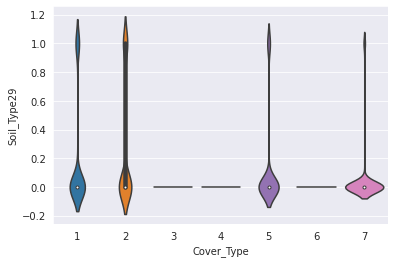

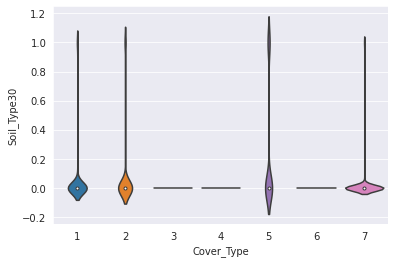

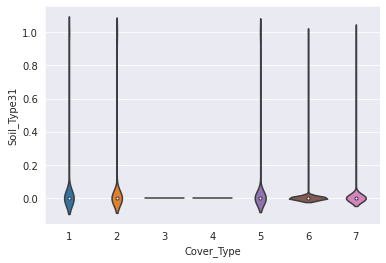

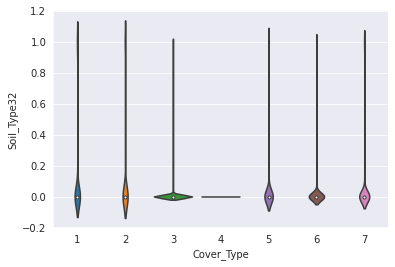

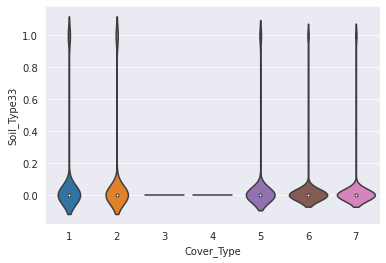

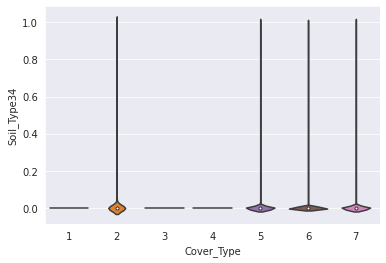

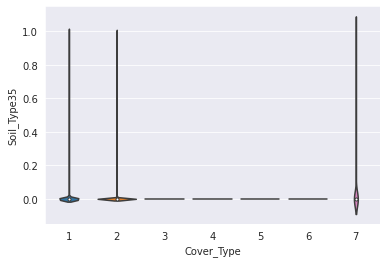

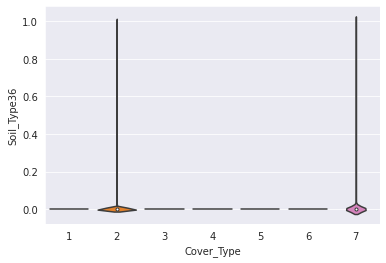

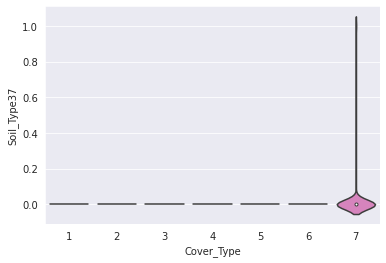

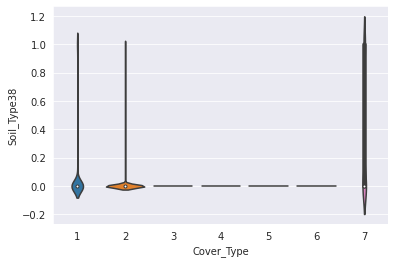

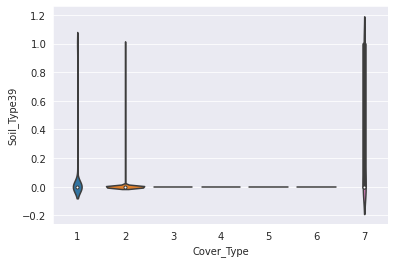

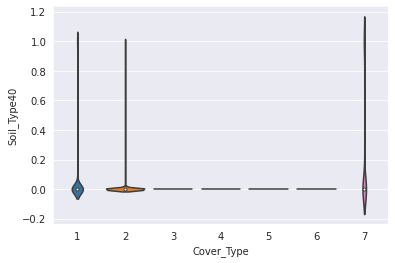

In [20]:
for col in data.columns[10:-3]:
    sns.violinplot(data=data, x="Cover_Type", y=col)
    plt.show()

In [83]:
data['Wild Areas'] = (data.iloc[:, 11:15] == 1).idxmax(1)
fig = px.pie(data, names="Wild Areas", height=300, width=800)
fig.show()

In [84]:
fig1 = px.histogram(data, x="Wild Areas", color="Cover_Type", barmode="group",
                    height=400, width=800)
fig1.show()

In [85]:
data['Soil types'] = (data.iloc[:, 15:55] == 1).idxmax(1)
fig2 = px.histogram(data, x="Soil types", color="Cover_Type", height=400, width=850)
fig2.show()

In [86]:
fig3 = px.pie(data, names="Soil types", height=400, width=850)
fig3.update_traces(textposition='inside')
fig3.show()

In [87]:
fig4 = px.box(data, x="Cover_Type", y="Elevation", color="Cover_Type", height=400, width=900)
fig4.update_layout(title={'text': "Elevation Box Plot"})
fig4.show()

In [88]:
temp = data.groupby(['Cover_Type'], as_index=False)[["Elevation"]].median()
temp.sort_values(by="Elevation", ascending=False).style.background_gradient(cmap="Reds")
print(temp)

   Cover_Type  Elevation
0           1     3144.0
1           2     2931.5
2           3     2409.0
3           4     2230.5
4           5     2793.0
5           6     2430.0
6           7     3364.0


In [89]:
fig5 = px.scatter(data, x='Elevation', y='Horizontal_Distance_To_Roadways', color='Cover_Type', width=800, height=400)
fig5.show()

In [90]:
fig6 = px.scatter(data, x='Aspect', y='Hillshade_3pm', color='Cover_Type', width=800, height=400)
fig6.show()

# Horizontal distance ~ Vertical distance to Hydrology
fig7 = px.scatter(data, x='Horizontal_Distance_To_Roadways', y='Vertical_Distance_To_Hydrology', color='Cover_Type',
                  width=800, height=400)
fig7.show()

# Hillshade at Noon ~ 3pm
fig8 = px.scatter(data, x='Hillshade_Noon', y='Hillshade_3pm', color='Cover_Type', width=800, height=400)
fig8.show()

Wilderness_Area3 gives no class distinction.  
Soil_Types 1, 5, 8, 9, 12, 14, 18-22, 25-30 and 35-40 give visible class distinction.

# Assessing interactions between variables

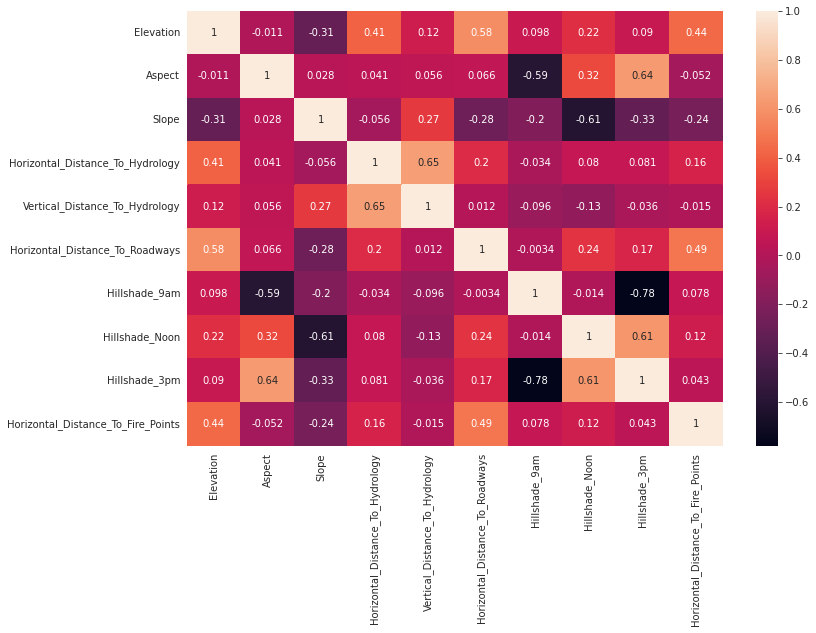

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(data.iloc[:,:10].corr(), annot=True)
plt.show()

We see that following pairs of features have strong correlation:  
1) Aspect - Hillshade_3pm  
2) Slope - Hillshade_Noon  
3) Horizontal_Distance_To_Hydrology - Vertical_Distance_To_Hydrology  
4) Hillshade_3pm — Hillshade_9am  
5) Hillshade_Noon — Hillshade_3pm  

# Modelling: Random Forest 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder

In [23]:
work = data.iloc[:, 0:54] 
y = data['Cover_Type']
y

Id
1        5
2        5
3        2
4        2
5        5
        ..
15116    3
15117    3
15118    3
15119    3
15120    3
Name: Cover_Type, Length: 15120, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(work, y, test_size=0.25, random_state = 42)
X_test

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
6078,2432,147,16,90,2,484,240,236,120,1385,...,0,0,0,0,0,0,0,0,0,0
7895,2653,114,14,175,38,2278,244,225,107,2345,...,0,0,0,0,0,0,0,0,0,0
6821,3542,315,31,255,130,3218,124,198,206,1448,...,0,0,0,0,0,0,0,0,0,1
1594,3191,286,20,30,12,4965,162,235,212,781,...,0,0,0,0,0,0,0,0,0,0
11987,2160,64,37,190,96,240,225,140,15,484,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,2319,333,10,0,0,1120,197,228,169,1410,...,0,0,0,0,0,0,0,0,0,0
10919,2672,221,30,134,89,2787,169,251,203,1206,...,0,0,0,0,0,0,0,0,0,0
11399,2502,357,9,323,24,671,206,224,156,3666,...,0,0,0,0,0,0,0,0,0,0


In [25]:
print('Training Work Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Work Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Work Shape: (11340, 54)
Training Labels Shape: (11340,)
Testing Work Shape: (3780, 54)
Testing Labels Shape: (3780,)


In [26]:
min_max_scaler = MinMaxScaler()
X_train_scaled=min_max_scaler.fit_transform(X_train)
X_test_scaled=min_max_scaler.transform(X_test)
print(X_test_scaled)

[[0.27740948 0.40833333 0.30769231 ... 0.         0.         0.        ]
 [0.39010709 0.31666667 0.26923077 ... 0.         0.         0.        ]
 [0.84344722 0.875      0.59615385 ... 0.         0.         1.        ]
 ...
 [0.31310556 0.99166667 0.17307692 ... 0.         0.         0.        ]
 [0.56501785 0.225      0.63461538 ... 0.         0.         0.        ]
 [0.44314125 0.10833333 0.40384615 ... 0.         0.         0.        ]]


In [27]:
print(X_train_scaled)

[[0.59357471 0.54166667 0.30769231 ... 0.         0.         0.        ]
 [0.37837838 0.41944444 0.25       ... 0.         0.         0.        ]
 [0.76491586 0.06666667 0.28846154 ... 0.         1.         0.        ]
 ...
 [0.54767976 0.425      0.28846154 ... 0.         0.         0.        ]
 [0.51504335 0.70555556 0.13461538 ... 0.         0.         0.        ]
 [0.75777664 0.21666667 0.13461538 ... 1.         0.         0.        ]]


In [28]:
#train
from sklearn.ensemble import RandomForestRegressor
rf_exp = RandomForestRegressor(n_estimators= 1000, random_state=100)
rf_exp.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=100)

In [29]:
# Make predictions on test data
predictions = rf_exp.predict(X_test)
predictions

array([4.977, 5.153, 2.332, ..., 2.177, 1.951, 3.782])

In [30]:
# Performance metrics
errors = abs(predictions - y_test)
errors

Id
6078     1.023
7895     2.153
6821     1.332
1594     1.297
11987    0.410
         ...  
5652     0.346
10919    0.022
11399    2.823
6757     0.951
13708    1.782
Name: Cover_Type, Length: 3780, dtype: float64

In [31]:
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
mape

24.607080435878057

In [32]:
# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 75.39 %.


In [33]:
#Grid_Search
random_forest = RandomForestClassifier()
'''params_forest = {'n_estimators': [100,300,500,1000],
                 'max_depth': [5,7,10,15,20],
                 'min_samples_leaf': [1,5,10,15,20]}'''
params_forest = {'n_estimators': [500],
                 'max_depth': [20],
                 'min_samples_leaf': [1]}

In [34]:
grid_forest = GridSearchCV(random_forest,params_forest,cv = 5)
grid_forest.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20], 'min_samples_leaf': [1],
                         'n_estimators': [500]})

In [36]:
grid_forest.best_score_

0.8491181657848325

In [35]:
grid_forest.best_params_

{'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 500}

In [37]:
best_forest = grid_forest.best_estimator_
best_forest 

RandomForestClassifier(max_depth=20, n_estimators=500)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 <a list of 54 Text major ticklabel objects>)

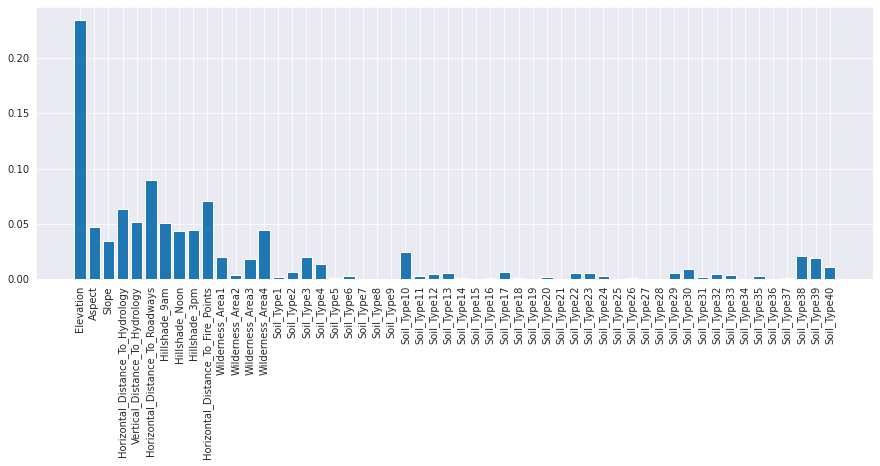

In [38]:
imp = best_forest.feature_importances_
plt.figure(figsize = (15,5))
plt.bar(X_train.columns, imp)
plt.xticks(rotation=90)

- Feature Importance:
<p> 1) Elevation
<p> 2) Horizontal_Distance_To_Roadways
<p> 3) Horizontal_Distance_To_Fire_Points

<ErrorbarContainer object of 3 artists>

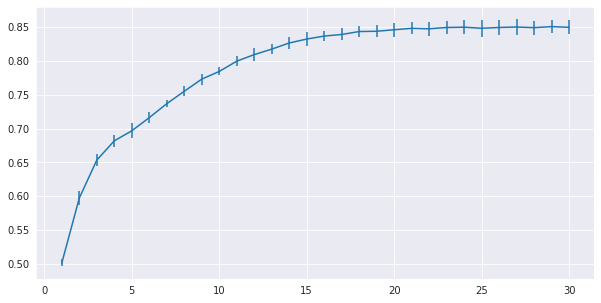

In [39]:
result_cv = []
result_std = []
for i in range(1,31):
    random_forest = RandomForestClassifier(n_estimators = 500, max_depth = i)
    res = cross_val_score(random_forest, X_train, y_train.values.ravel())
    result_cv.append(res.mean())
    result_std.append(res.std())
plt.figure(figsize = (10,5))
plt.errorbar(range(1,31), result_cv, yerr=result_std)

In [42]:
accuracy_score(best_forest.predict(X_test), y_test)

0.8634920634920635

# Decision Tree

In [44]:
tree_clf = DecisionTreeClassifier()
'''params_tree = {'max_depth': [6, 10,15,20, 25, 30],
              'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_leaf': [1,5,10,15]}'''
params_tree = {'max_depth': [30],
              'criterion': ['entropy'],
              'splitter': ['random'],
              'min_samples_leaf': [1]}
search_tree = GridSearchCV(tree_clf, params_tree, cv = 5)

In [45]:
search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [30],
                         'min_samples_leaf': [1], 'splitter': ['random']})

In [46]:
search_tree.best_score_

0.7775132275132275

In [47]:
search_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [48]:
best_tree = search_tree.best_estimator_
best_tree

DecisionTreeClassifier(criterion='entropy', max_depth=30, splitter='random')

In [53]:
text_representation = tree.export_text(best_tree)
print(text_representation)

|--- feature_13 <= 0.71
|   |--- feature_12 <= 0.04
|   |   |--- feature_0 <= 3025.89
|   |   |   |--- feature_8 <= 110.36
|   |   |   |   |--- feature_43 <= 0.85
|   |   |   |   |   |--- feature_0 <= 2961.31
|   |   |   |   |   |   |--- feature_42 <= 0.92
|   |   |   |   |   |   |   |--- feature_37 <= 0.51
|   |   |   |   |   |   |   |   |--- feature_0 <= 2784.61
|   |   |   |   |   |   |   |   |   |--- feature_25 <= 0.45
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 4.61
|   |   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  4.61
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_25 >  0.45
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- feature_0 >  2784.61
|   |   |   |   |   |   |   |   |   |--- feature_9 <= 732.02
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 <a list of 54 Text major ticklabel objects>)

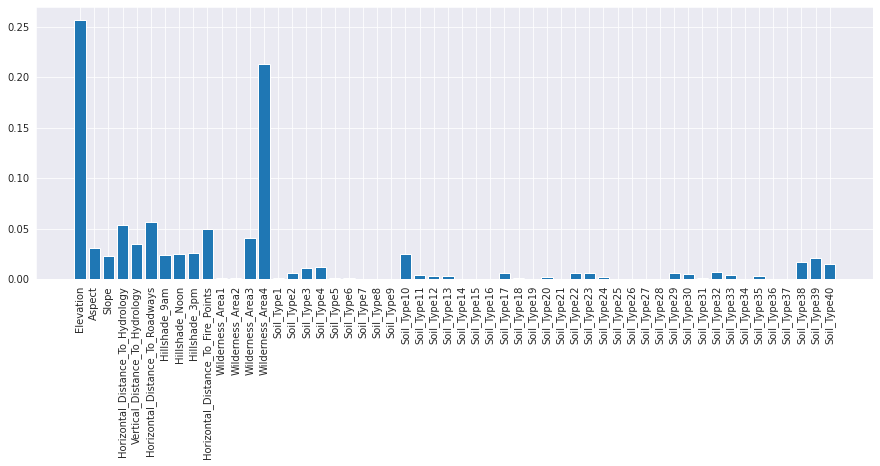

In [54]:
imp = best_tree.feature_importances_
plt.figure(figsize = (15,5))
plt.bar(X_train.columns, imp)
plt.xticks(rotation=90)

- Feature:
<p> 1) Elevation
<p> 2) Wilderness_Area4

In [55]:
accuracy_score(best_tree.predict(X_test), y_test)

0.8013227513227513

# LightGBM

- LightGBM — это фреймворк, который предоставляет реализацию деревьев принятия решений(Decision Tree) с __градиентным бустингом__.

- Parametrs: best_params, best_score, feature_importances_ for calculate Feature Importance 

In [57]:
'''lgb_train = lgb.LGBMClassifier(objective = 'multiclass')
param_lgb = {'num_leaves': [25, 40,70,100,130,160],
             'n_estimators': [100,300,700]}'''
lgb_train = lgb.LGBMClassifier(objective = 'multiclass')
param_lgb = {'num_leaves': [100],
             'n_estimators': [700]}

In [58]:
search = GridSearchCV(lgb_train, param_lgb, cv = 5)
search

GridSearchCV(cv=5, estimator=LGBMClassifier(objective='multiclass'),
             param_grid={'n_estimators': [700], 'num_leaves': [100]})

In [59]:
search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=LGBMClassifier(objective='multiclass'),
             param_grid={'n_estimators': [700], 'num_leaves': [100]})

In [60]:
search.best_params_
#{'num_leaves': 150, 'n_estimators': 300, 'learning_rate': 0.1}
#{'max_depth': -1, 'n_estimators': 700, 'num_leaves': 25}
#{'n_estimators': 700, 'num_leaves': 100}

{'n_estimators': 700, 'num_leaves': 100}

In [61]:
search.best_score_

0.861111111111111

In [63]:
best_lgbm = search.best_estimator_
best_lgbm

LGBMClassifier(n_estimators=700, num_leaves=100, objective='multiclass')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 <a list of 54 Text major ticklabel objects>)

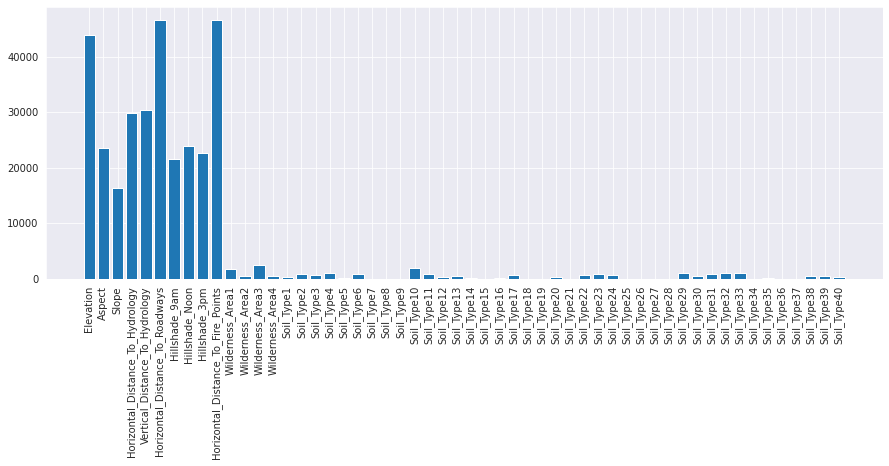

In [65]:
plt.figure(figsize = (15,5))
plt.bar(X_train.columns, best_lgbm.feature_importances_)
plt.xticks(rotation=90)

- Feature Importance:
<p> 1) Elevation
<p> 2) Horizontal_Distance_To_Roadways
<p> 3) Horizontal_Distance_To_Fire_Points

In [71]:
accuracy_score(y_test, best_lgbm.predict(X_test))

0.879100529100529

In [72]:
confusion_matrix(y_test, best_lgbm.predict(X_test))

array([[413,  71,   0,   0,  12,   0,  24],
       [105, 382,  15,   0,  43,  11,   4],
       [  0,   3, 459,  18,   2,  54,   0],
       [  0,   0,   6, 541,   0,   5,   0],
       [  2,  10,  10,   0, 504,   1,   0],
       [  1,   6,  30,  10,   4, 480,   0],
       [ 10,   0,   0,   0,   0,   0, 544]])

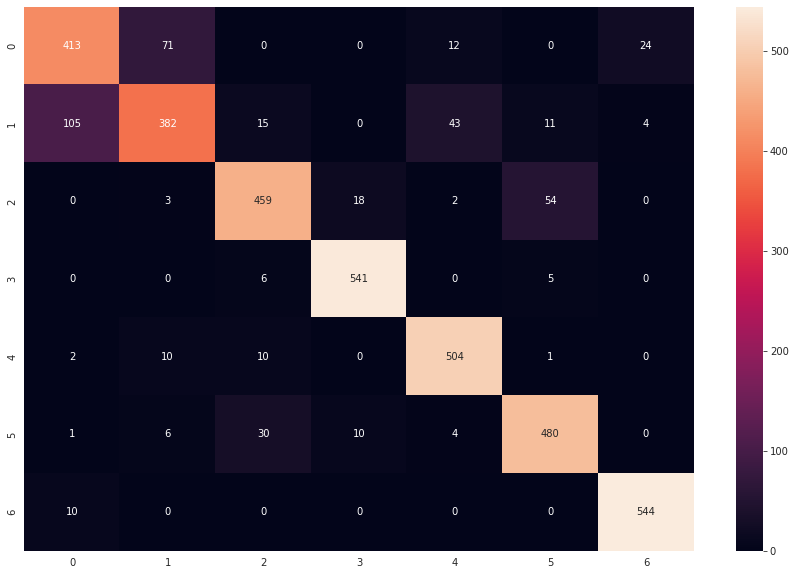

In [73]:
plt.figure(figsize = (15,10))
sns.heatmap(confusion_matrix(y_test, best_lgbm.predict(X_test)), fmt='', annot=True)

In [76]:
test = pd.read_csv('test.csv')
test.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0
5,15126,2699,21,18,30,3,2890,206,200,127,...,0,0,0,0,0,0,0,0,0,0
6,15127,2699,15,17,30,6,2860,202,202,133,...,0,0,0,0,0,0,0,0,0,0
7,15128,2696,10,16,30,6,2830,202,207,140,...,0,0,0,0,0,0,0,0,0,0
8,15129,2696,17,13,30,6,2770,208,211,138,...,0,0,0,0,0,0,0,0,0,0
9,15130,2693,14,15,30,7,2741,205,209,138,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Save as csv 
predict = best_lgbm.predict(test.drop('Id', axis = 1))
submission = pd.DataFrame({'Id': test['Id'], 'Cover_Type': predict}).set_index('Id')
submission.to_csv('sub.csv')

In [78]:
submission.head()

,Cover_Type
Id,
15121,1
15122,1
15123,1
15124,1
15125,5
